In [5]:
import numpy as np
from libtiff import TIFF
import itk
import itkwidgets
import matplotlib.pyplot as plt

In [2]:
# This is unnecessary now IFF you have the npy file.
x,y,z = 1085, 1085, 1789
img = np.zeros([x,y,z], dtype=np.float32)
for i in range(z):
    tif = TIFF.open(r"./2024_REU_PNNL/3DprintA_downx2_" + str(i) + ".tif", mode='r')
    img[:,:,i] = tif.read_image()
    
# Save the stack to a .npy stack!
# np.save("./2024_FULL-STACK.npy", img)

In [4]:
img = np.load('2024_FULL-STACK.npy')

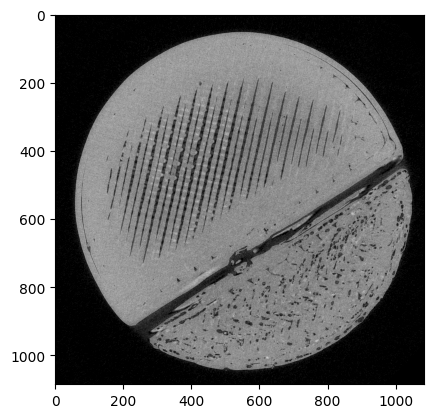

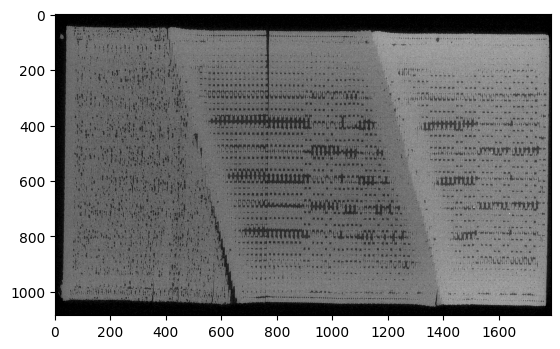

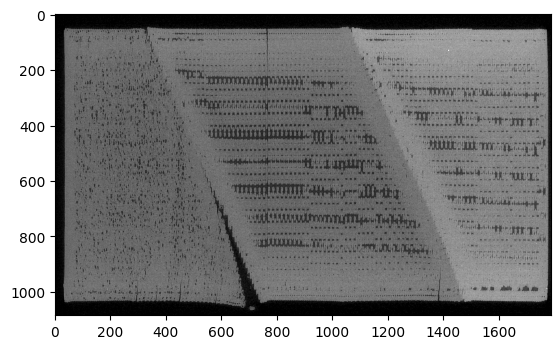

In [22]:
plt.imshow(img[:,:,600], cmap='gray', vmin=10000)
plt.show()

plt.imshow(img[542,:,:], cmap='gray', vmin=10000, vmax=14000)
plt.show()

plt.imshow(img[:,542,:], cmap='gray', vmin=10000, vmax=14000)
plt.show()

In [2]:
import os
dataDirectory = "./2024_REU_PNNL/"

imageSet = []

for fileNum in range(len(os.listdir(dataDirectory))):
  fileInd = '/3DprintA_downx2_%d.tif' % fileNum
  fileDir = dataDirectory + fileInd
  imageSet.append(fileDir)

volume = itk.imread(imageSet)

In [3]:
print(type(volume))

<class 'itk.itkImagePython.itkImageF3'>


In [3]:
itkwidgets.view(volume)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…